# Imports

In [1]:
from scipy.stats import gamma
import scipy.stats as scst
import numpy as np
import matplotlib.pyplot as plt

# Make data

In [2]:
alpha = 1.35 # Shape (Alpha)
theta = 5.05 # Scale (Beta)

x = np.linspace(0, 1, 100)

pdf = gamma.pdf(x, a = alpha, scale = theta)
cdf = gamma.cdf(x, a = alpha, scale = theta)


In [6]:
y = np.linspace(0,0,100)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


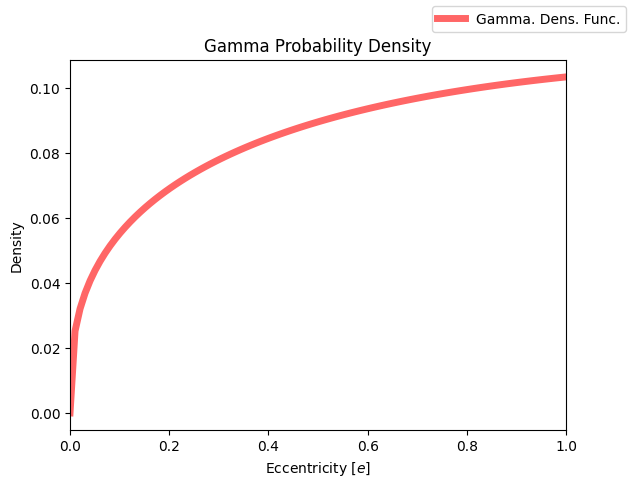

In [12]:
bbox = dict(boxstyle = "round", fc = "orange", ec = "grey", alpha = 0.5)

fig, axs = plt.subplots()

axs.plot(x, pdf, "r-", lw=5, alpha = 0.6, label = "Gamma. Dens. Func.")
# axs.plot(x, y, "b-", lw=5, alpha = 0.6, label = "Uniform Dist. Func.")
plt.xlim(0,1)
# axs.text(0.15, 0.5, stats, fontsize = 9, bbox = bbox)
axs.set_xlabel("Eccentricity [$e$]")
axs.set_ylabel("Density")

fig.legend()
plt.title("Gamma Probability Density")
plt.show()